# Módulo Visualização de Dados
## Enunciado

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe. Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:

- 1 Gráfico de pizza
- 1 Gráfico de barra
- 1 Gráfico de Histograma
- 1 Gráfico de densidade
- 1 Gráfico de dispersão
- 1 Mapa de calor
- 1 Gráfico de Regressão

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos. Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

## Solução da tarefa

### Descrição geral
O presente exercício visa realizar a análise do arquivo `ecommerce_preparados.csv` seguindo as intruções apresentadas no enunciado. O presente arquivo jupyter apresente seis células. Cada célula apresenta uma breve introdução apresentando o objetivo da análise e o racicínio empregado para a constrição de cada uma delas.

### Tratamento inicial do DataFrame 

1. Primeiro, eliminamos informação desnecessária para construção dos gráficos;
2. Em seguida, realizamos a análise de valores nulos para verificar o impacto do uso da função `dropna()`
3. Tratamento dos valores nulos
4. Criação de um DataFrame auxiliar para análise do impacto do Desconto nas vendas.
    - Criação da coluna `Percentual_Desconto`
5. Apresentação dos valores únicos do *DataFrame* principal para seleção das colunas que serão analisadas nos gráficos de pizza e barras. 

No que diz respeito ao tópico 5, a coluna selecionada para a criação dos gráficos mencionados foi a coluna relacionada ao gênero. 

**Justificativa:** Segunda menor quantidade de categorias e uma diversidade razoável.

In [25]:
# Bibliotecas utilizadas

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seleção do arquivo CSV
df = pd.read_csv('ecommerce_preparados.csv')

# Filtrando os dados
df = df[['Título', 'Marca', 'Material', 'Gênero', 'Temporada', 'Preço', 'Desconto', 'Qtd_Vendidos_Cod']]

# Análise de dados nulos
nulos_abs = df.isna().sum()
nulos_perc = ((df.isna().sum() / len(df)) * 100).round(2)
df_nulos = pd.DataFrame({'Valores Nulos': nulos_abs, 'Percentual (%)': nulos_perc})
print(df_nulos)

# Tratamento de dados nulos
df = df.dropna(subset=['Preço'])
df = df.dropna(subset=['Gênero'])
df = df.dropna(subset=['Qtd_Vendidos_Cod'])
df['Desconto'] = df['Desconto'].fillna(0)

# Criação de novo DataFrame para análise de desconto x quantidade vendida
df_desconto = df[['Preço', 'Desconto', 'Qtd_Vendidos_Cod']]
df_desconto = df_desconto[df_desconto['Desconto'] > 0]
df_desconto['Percentual_Desconto'] = ((df_desconto['Desconto'] / df_desconto['Preço']) * 100).round(2)
df_desconto = df_desconto[df_desconto['Percentual_Desconto'] < 100]

# Valores únicos do DataFrame Principal
print("\nINFORMAÇÃO DE DADOS ÚNICOS DF GERAL: ")
print(df.nunique())


                  Valores Nulos  Percentual (%)
Título                        0            0.00
Marca                         0            0.00
Material                    867           39.43
Gênero                       79            3.59
Temporada                     0            0.00
Preço                       235           10.69
Desconto                   1325           60.25
Qtd_Vendidos_Cod            226           10.28

INFORMAÇÃO DE DADOS ÚNICOS DF GERAL: 
Título              1450
Marca                664
Material             147
Gênero                13
Temporada             10
Preço                913
Desconto              49
Qtd_Vendidos_Cod      12
dtype: int64


## Tratamento da coluna gênero

1. **Tratamento de casos inesperados**: `short menina verao look mulher`, `roupa para gordinha pluss P ao 52` e `bermuda feminina brilho Blogueira` tratados como `Feminino`
2. **Correções de imprecisão:** `Mulher` tratado como `Feminino`, `menino` tratado como `Meninos` e `Unissex` tratado como `Sem gênero`

In [16]:
# Tratamento da coluna Gênero

labels = df['Gênero'].unique()
print(labels)

valores_a_substituir_para_feminino = [
    'short menina verao look mulher',
    'roupa para gordinha pluss P ao 52',
    'Mulher',
    'bermuda feminina brilho Blogueira'
]

df['Gênero'] = df['Gênero'].replace(valores_a_substituir_para_feminino, 'Feminino')
df['Gênero'] = df['Gênero'].replace('menino', 'Meninos')
df['Gênero'] = df['Gênero'].replace('Unissex', 'Sem gênero')

labels_atualizados = df['Gênero'].unique()
print(labels_atualizados)

['Sem gênero' 'Masculino' 'Feminino' 'Sem gênero infantil' 'Meninas'
 'Bebês' 'Meninos']
['Sem gênero' 'Masculino' 'Feminino' 'Sem gênero infantil' 'Meninas'
 'Bebês' 'Meninos']


### Análise da distribuição de gênero dos produtos
1. A partir da análise do gráfico, notou-se um valor expressivo em relação aos produtos classificados como Feminino, Masculino e Bebês;
2. Nota-se também que a quantidade de produtos para bebês é um pouco mais expressiva que a venda para crianças representadas por "Sem genêro infantil", "Meninos" e "Meninas". Enquanto bebês representa 14,56% dos produtos, os de criança representam 13,68%.

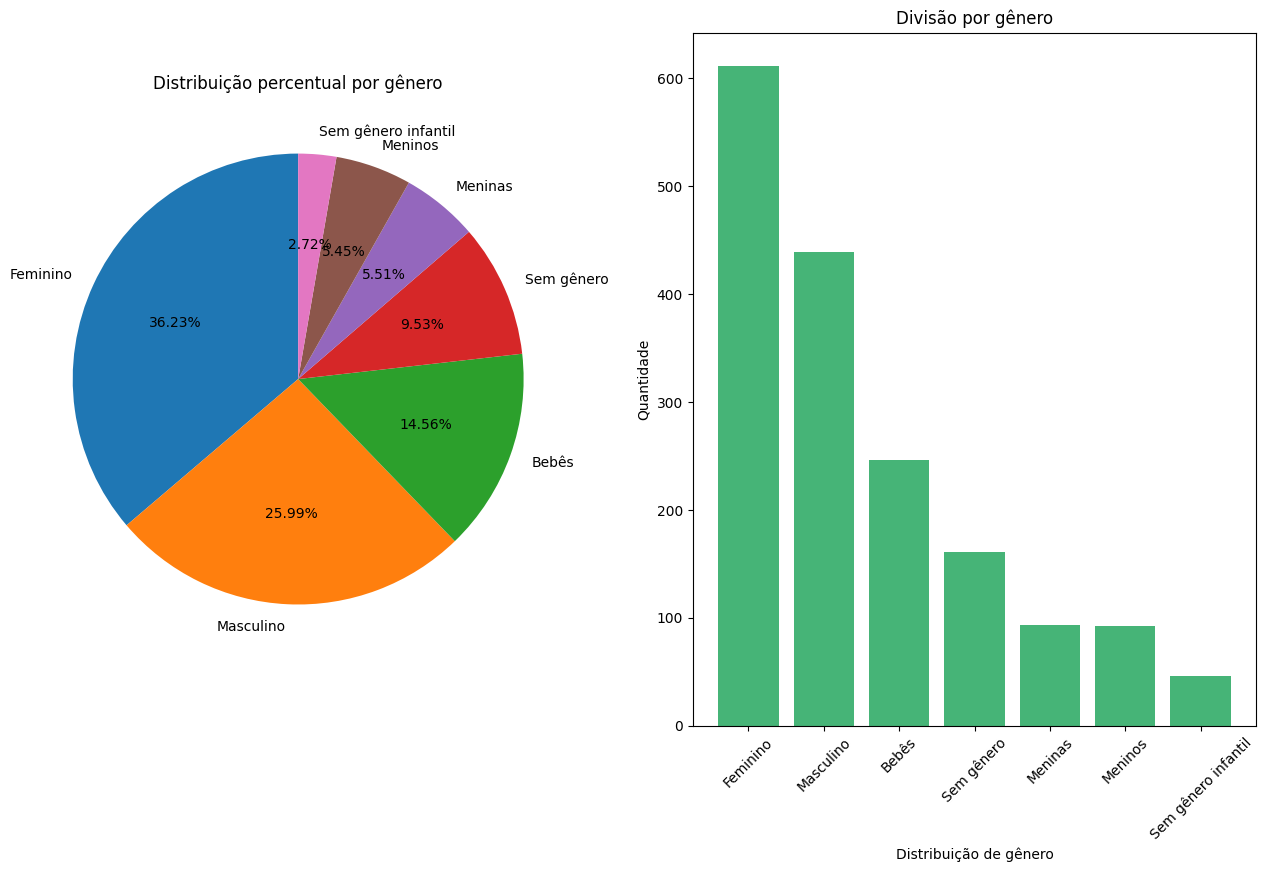

In [ ]:
# Análise da distribuição de gênero dos produtos

x = df['Gênero'].value_counts().index
y = df['Gênero'].value_counts().values

plt.figure(figsize=(16,9))

# Gráfico de pizza
plt.subplot(1, 2, 1)
plt.pie(y, labels=x, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual por gênero")

# Gráfico de barras
plt.subplot(1, 2, 2)
plt.bar(x, y, color='#089b49', alpha=0.75)
plt.title("Divisão por gênero")
plt.xlabel('Distribuição de gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

## Análise da distribuição de preços
1. Optou-se pelo agrupamento do Histograma e da Densidade, pelo fato de enquanto o primeiro ser a relação discreta, os segundo é a relação contínua. *Grosso modo*, apresentam uma certa relação de equivalência;
2. Nota-se que a maioria dos produtos a venda concentra-se na faixa de 0-70 reais.

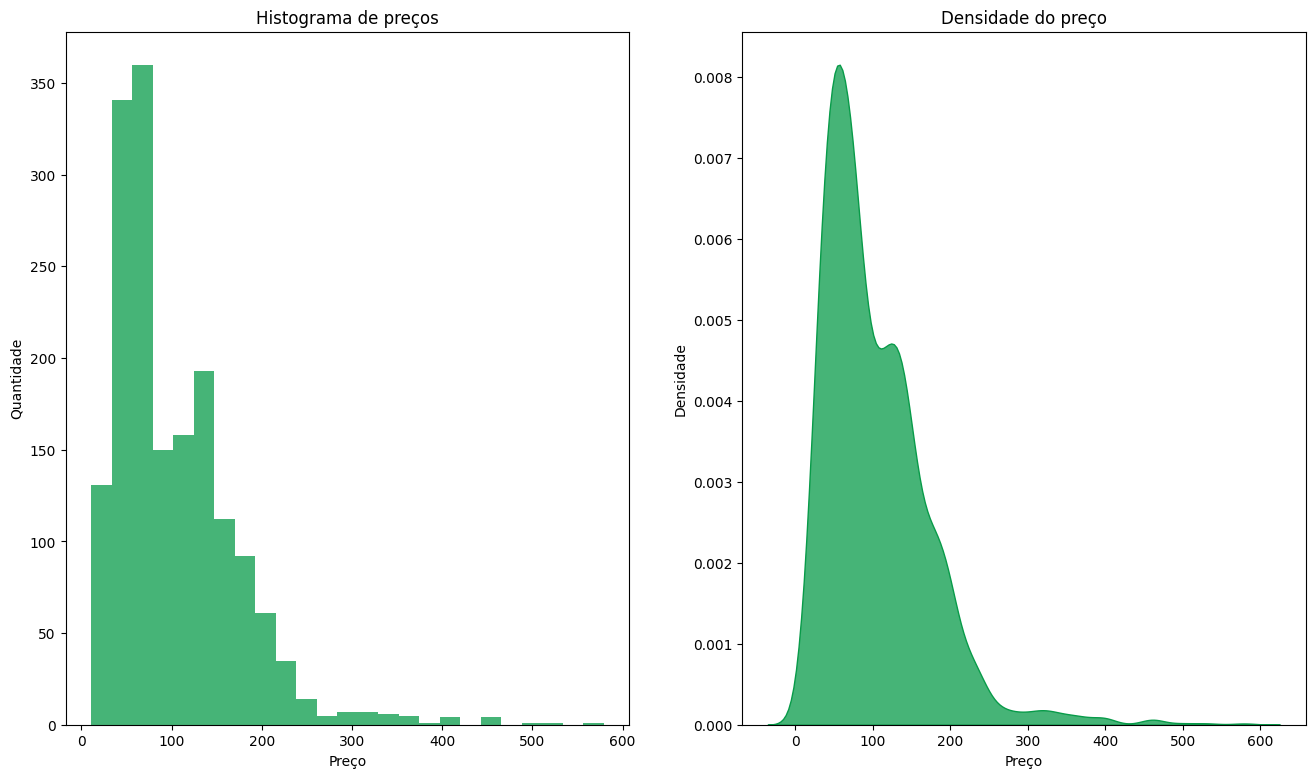

In [19]:
# Análise da distribuição de preços

plt.figure(figsize=(16,9))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df['Preço'],  color='#089b49', alpha=0.75, bins=25)
plt.title("Histograma de preços")
plt.xlabel("Preço")
plt.ylabel("Quantidade")

# Gráfico de densidade
plt.subplot(1, 2, 2)
sns.kdeplot(df['Preço'], fill=True, color='#089b49', alpha=0.75)
plt.title('Densidade do preço')
plt.xlabel('Preço')
plt.ylabel('Densidade')

plt.show()

### Relação ao desconto x quantidade vendida
1. A análise foi realizada a partir do DataFrame de desconto;
2. Nota-se que descontos altos (acima de 50%) não refletem no aumento da venda. Vide dispersão e mapa de calor;
3. Temos 3 *outliers* de produtos de 10%-20% que obtiveram sucesso em vendas;
4. Houve vendas expressivas na faixa de 10mil, produtos que estavam com desconto de 10-25% de desconto.

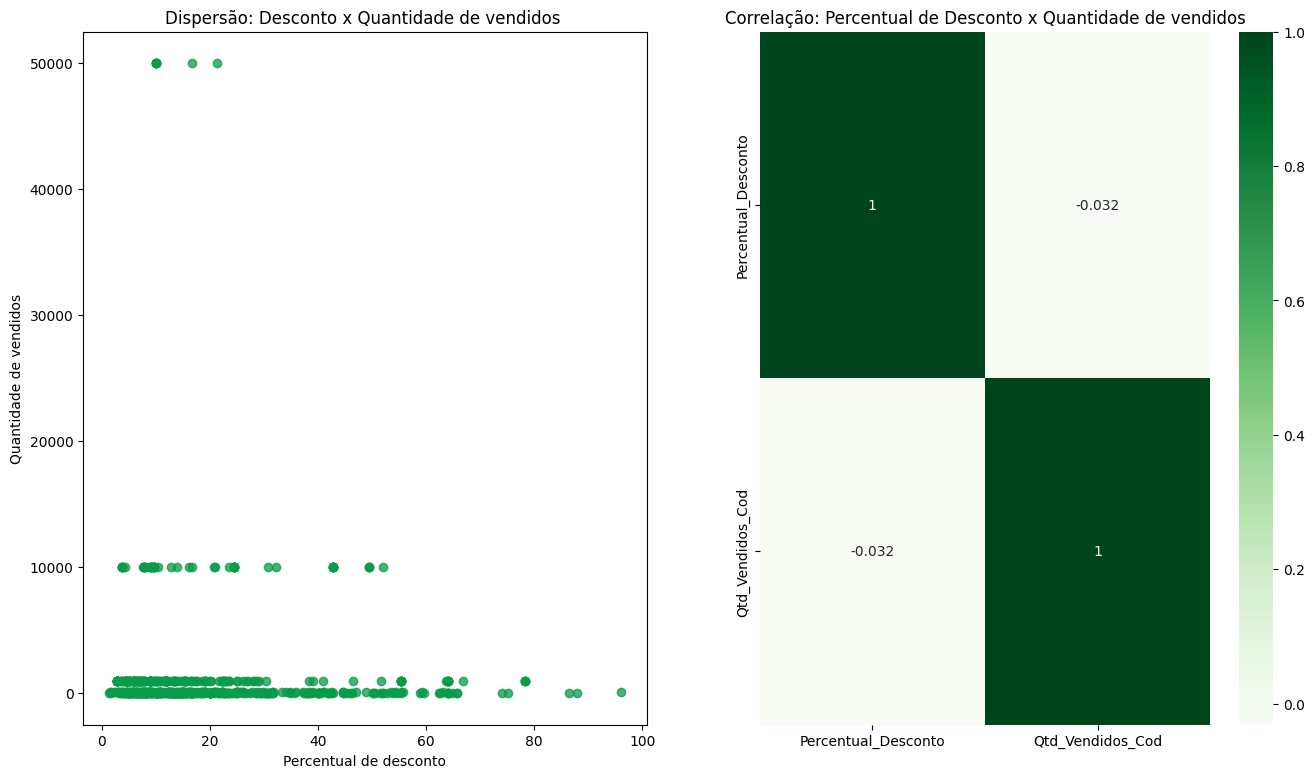

In [23]:
# Relação ao desconto x quantidade vendida

plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)

# Gráfico de dispersão
plt.scatter(df_desconto['Percentual_Desconto'], df_desconto['Qtd_Vendidos_Cod'], color='#089b49', alpha=0.75)
plt.xlabel('Percentual de desconto')
plt.ylabel('Quantidade de vendidos')
plt.title('Dispersão: Desconto x Quantidade de vendidos ')

# Mapa de calor
plt.subplot(1, 2, 2)
corr = df_desconto[['Percentual_Desconto', 'Qtd_Vendidos_Cod']].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlação: Percentual de Desconto x Quantidade de vendidos')

plt.show()

### Relação de desconto x preço

1. Observa-se novamente uma concentração de valores abaixo de 100. 
2. Nota-se que há um aumento sutil no desconto à medida que o preço aumenta.

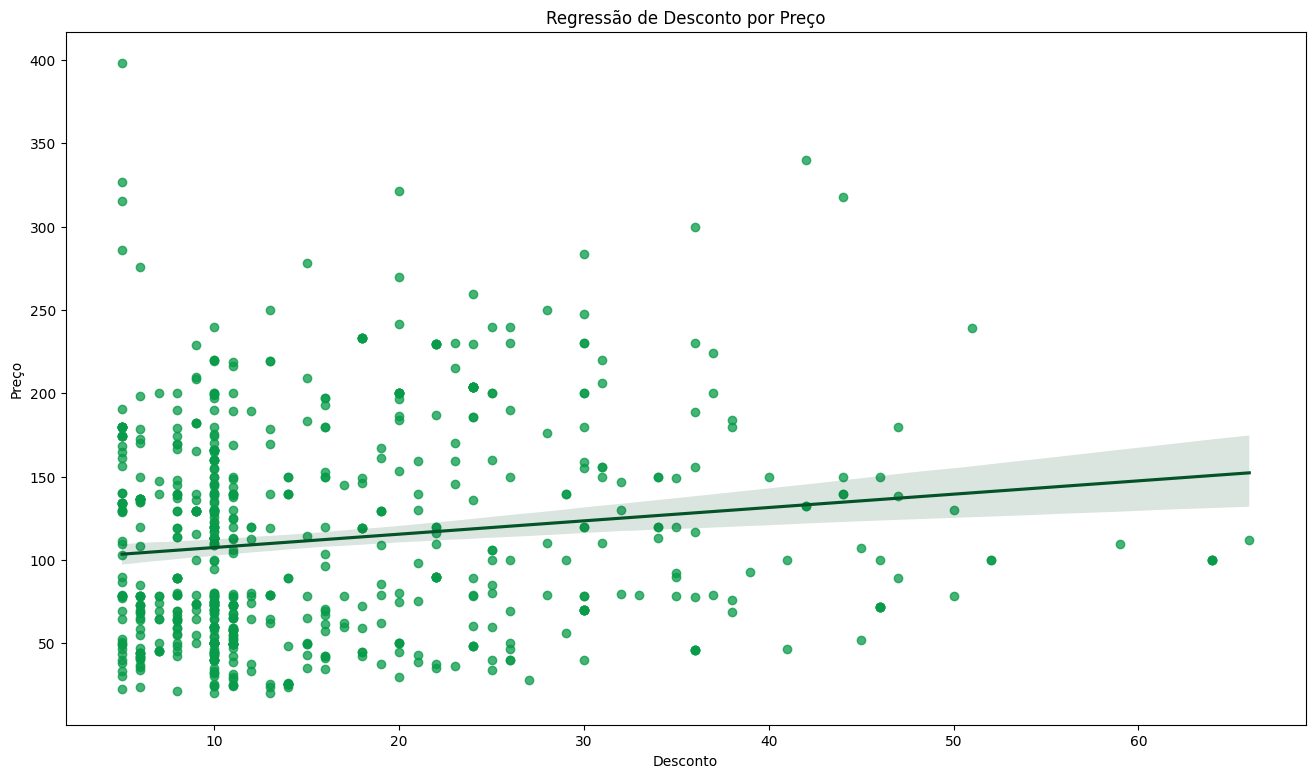

In [ ]:
# Relação de desconto x preço

# Gráfico de Regressão 
plt.figure(figsize=(16,9))
sns.regplot(x='Desconto', y='Preço', data=df_desconto, color='#045227', scatter_kws={'alpha': 0.75, 'color': '#089b49'})
plt.xlabel('Desconto')
plt.ylabel('Preço')
plt.title('Regressão de Desconto por Preço')
plt.show()